# Free Fall & Equations

* Free fall refers to the motion of an object falling solely under the influence of gravity, without any other forces acting on it. In a vacuum, where air resistance is negligible, all objects fall with the same acceleration, which is approximately $9.8m/s^{2}$ on the surface of the Earth. This experimentally determined fact is unexpected because we are so accustomed to the effects of air resistance and friction that we expect light objects to fall slower than heavy ones. Until Galileo Galilei (1564–1642) proved otherwise people believed that a heavier object has a greater acceleration in a free fall. We now know this is not the case. In the absence of air resistance, heavy objects arrive at the ground at the same time as lighter objects when dropped from the same height. Although $g$ (acceleration due to gravity) varies from $9.78m/s^2$ to $9.83m/s^2$.
* We take the direction of acceleration due to gravity to be downward (toward the center of Earth). In fact, its direction defines what we call vertical. Whether acceleration $a$ in the kinematic equations has the value $+g$ or $-g$ depends on how we define our coordinate system.
* If an object is dropped, we know the initial velocity is zero when in free fall. When the object has left contact with whatever held or threw it, the object is in free fall. When the object is thrown, it has the same initial speed in free fall as it did before it was released. When the object comes in contact with the ground or any other object, it is no longer in free fall and its acceleration of $g$ is no longer valid.

## Position Equation
> $h(t) = h_0 - \frac{1}{2} g t^2$

or

> $y = y_{0}+v_{0}t - \frac{1}{2} gt^2$

## Velocity Equation
> $v(t) = v_0 - g t$

## Acceleration Equation
> $a(t) = -g$

## Velocity Squared Equation
> $v^2 = v_0^2 + 2g(y-y_{0})$

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
plt.style.use("dark_background")
%matplotlib inline

In [2]:
def HeightInFreeFall(initialHeight:int or float,time:int or float)->int or float:
  gravity = 9.8 # g, Acceleration due to gravity in m/s^2
  height = initialHeight-0.5*gravity*time**2
  return height

In [3]:
initialHeight = 50 # meteres
timeRange = np.linspace(0,5,100) # Time range from 0 to 5 seconds with small intervals

In [5]:
heightValues = [HeightInFreeFall(initialHeight,time) for time in timeRange]

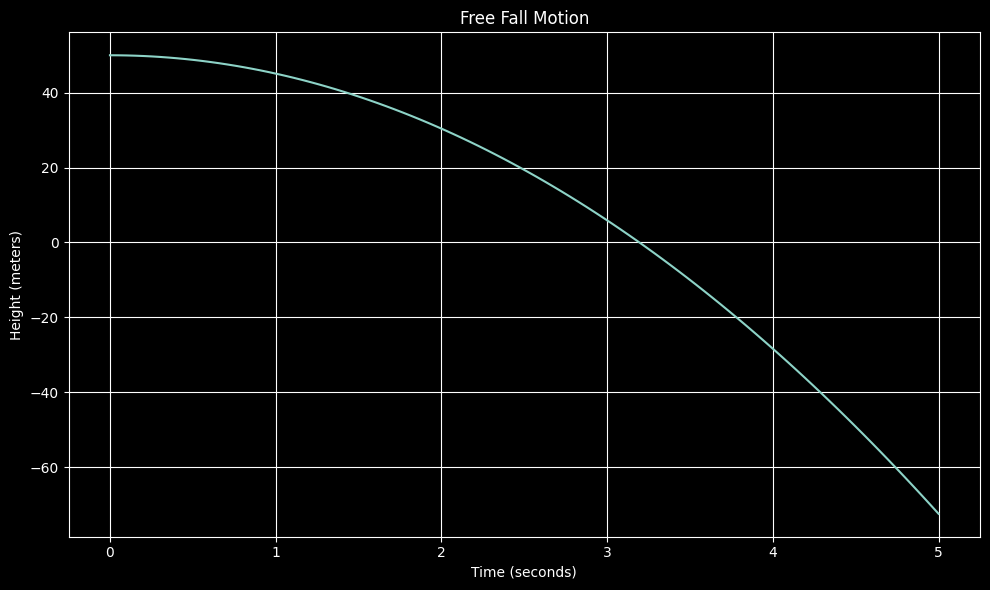

In [6]:
plt.figure(figsize=(10,6))
plt.title("Free Fall Motion")
plt.plot(timeRange,heightValues)
plt.xlabel("Time (seconds)")
plt.ylabel("Height (meters)")
plt.tight_layout()
plt.grid(True)
plt.show()

## Example

**At 1-s intervals, with an initial velocity of 4.9 m/s downward, that is thrown from the top of a 98-m-high building.**

(a) How much time elapses before the ball reaches the ground?

(b) What is the velocity when it arrives at the ground?

In [23]:
def FreeFallPositionVelocity(initialVelocity:int or float,initialHeight:int or float,timeInterval:int)->tuple:
  g = 9.8 # Acceleration due to gravity in m/s^2
  velocity = initialVelocity
  height = initialHeight
  time = 0
  positions = []
  velocities = []
  times = []
  while height >= 0:
    positions.append(height)
    velocities.append(velocity)
    time += timeInterval
    times.append(time)
    height = initialHeight+(initialVelocity*time)-0.5*g*time**2
    #height = initialHeight-0.5*g*time**2
    velocity = initialVelocity-g*time
  return positions,velocities,time,times

In [24]:
initialVelocity = -4.9 # downward, so negative
initialHeight = 98 # meters
timeInterval = 1 # in seconds

In [25]:
positions,velocities,totalTime,times = FreeFallPositionVelocity(initialVelocity,initialHeight,timeInterval)
print(f"(a) Time elapsed before the ball reaches the ground: {totalTime} seconds.")
print(f"(b) Velocity when it arrives at the ground: {velocities[-1]:.2f} m/s.")

(a) Time elapsed before the ball reaches the ground: 5 seconds.
(b) Velocity when it arrives at the ground: -44.10 m/s.


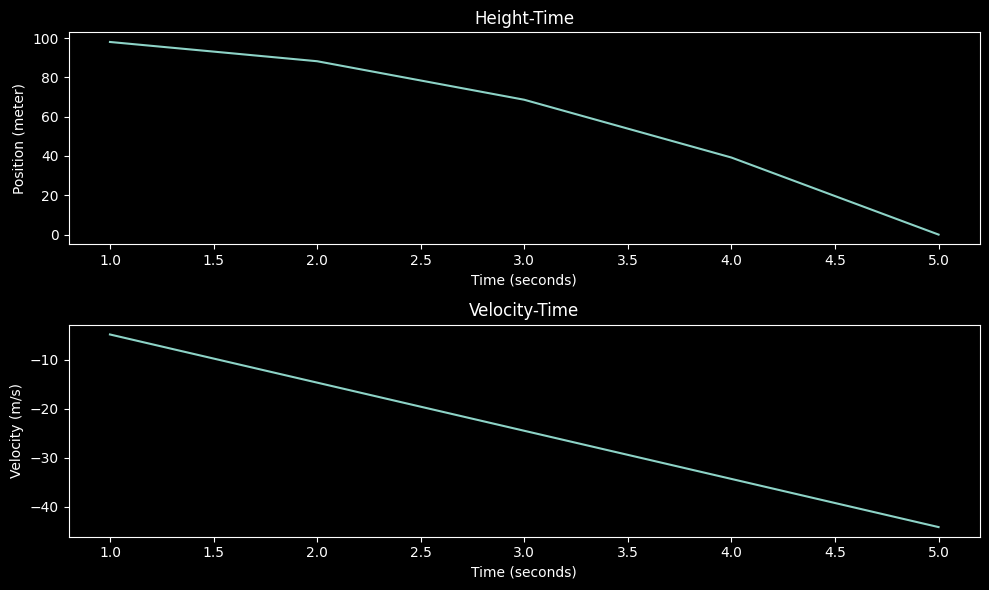

In [26]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(times,positions)
plt.title("Height-Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Position (meter)")
plt.subplot(2,1,2)
plt.plot(times,velocities)
plt.title("Velocity-Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Velocity (m/s)")
plt.tight_layout()
plt.show()

## Example

**A batter hits a baseball straight upward at home plate and the ball is caught 5.0 s after it is struck.**

(a) What is the initial velocity of the ball?

(b) What is the maximum height the ball reaches?

(c) How long does it take to reach the maximum height?

(d) What is the acceleration at the top of its path?

(e) What is the velocity of the ball when it is caught?

In [46]:
def UpwardMotion(totalTime:int)->tuple:
  g = 9.8 # Acceleration due to gravity in m/s^2
  # Initial Conditions
  topVelocity = 0 # At the top of the motion, final velocity
  initialHeight = 0
  finalHeight = 0
  # Formulations Related to fundamentals
  initialVelocity = ((finalHeight)+(0.5*g*totalTime**2)-(initialHeight))/totalTime
  maximumHeight = ((topVelocity**2-initialVelocity**2)/(-2*g))+initialHeight
  timeToMaxHeight = (topVelocity-initialVelocity)/-g
  acceleration = g
  velocityWhenCaught = initialVelocity-g*totalTime
  return initialVelocity,maximumHeight,timeToMaxHeight,acceleration,velocityWhenCaught


In [42]:
totalTime = 5.0 # in seconds

In [47]:
initialVelocity,maximumHeight,timeToMaxHeight,acceleration,velocityWhenCaught = UpwardMotion(totalTime)

In [48]:
print(f"(a) Initial velocity of the ball: {initialVelocity:.2f} m/s.")
print(f"(b) Maximum height the ball reaches: {maximumHeight} meters.")
print(f"(c) Time to reach the maximum height: {timeToMaxHeight:.2f} seconds.")
print(f"(d) Acceleration at the top of its path: {acceleration:.2f} m/s^2.")
print(f"(e) Velocity of the ball when it is caught: {velocityWhenCaught:.2f} m/s.")

(a) Initial velocity of the ball: 24.50 m/s.
(b) Maximum height the ball reaches: 30.62500000000001 meters.
(c) Time to reach the maximum height: 2.50 seconds.
(d) Acceleration at the top of its path: 9.80 m/s^2.
(e) Velocity of the ball when it is caught: -24.50 m/s.


# Kinematic Equations from Integral Calculus

* In kinematics, the kinematic equations are generally based on derivatives, particularly with respect to time.

## Position Equation
> $x(t) = x_0 + \int v(t)dt$

## Velocity Equation
> $v(t) = v_0 + \int a(t) \, dt$

## Acceleration Equation
> $a(t) = \frac{dv(t)}{dt}$

## Example

**A motorboat is traveling at a constant velocity of 5.0 m/s when it starts to accelerate opposite to the motion to arrive at the dock. Its acceleration is**

$a_t= - \frac{1}{4}t$ $m/s^3$

In [51]:
def AccelerationFunction(time:int)->int or float:
  return (-1/4)*time

In [63]:
def VelocityFunction(time:int)->int or float:
  result,_ = quad(AccelerationFunction,0,time)
  return 5.0+result # Initial velocity is 5.0 m/s

In [64]:
resultVelocity = VelocityFunction(time=6.3)
print(resultVelocity) # the velocity function equal to zero whent t=6.3 sec

0.038750000000000284


In [54]:
def PositionFunction(time:int)->int or float:
  result,_ = quad(VelocityFunction,0,time)
  return result

In [66]:
resultPosition = PositionFunction(time=6.3)
print(resultPosition) # Since the initial position is taken to be zero, we only have to evaluate the position function at the time when the velocity is zero

21.081375


In [71]:
timeIntervals = np.linspace(0,10,100) # 0-10 sec

In [72]:
velocityValues = np.vectorize(VelocityFunction)(timeIntervals)
positionValues = np.vectorize(PositionFunction)(timeIntervals)

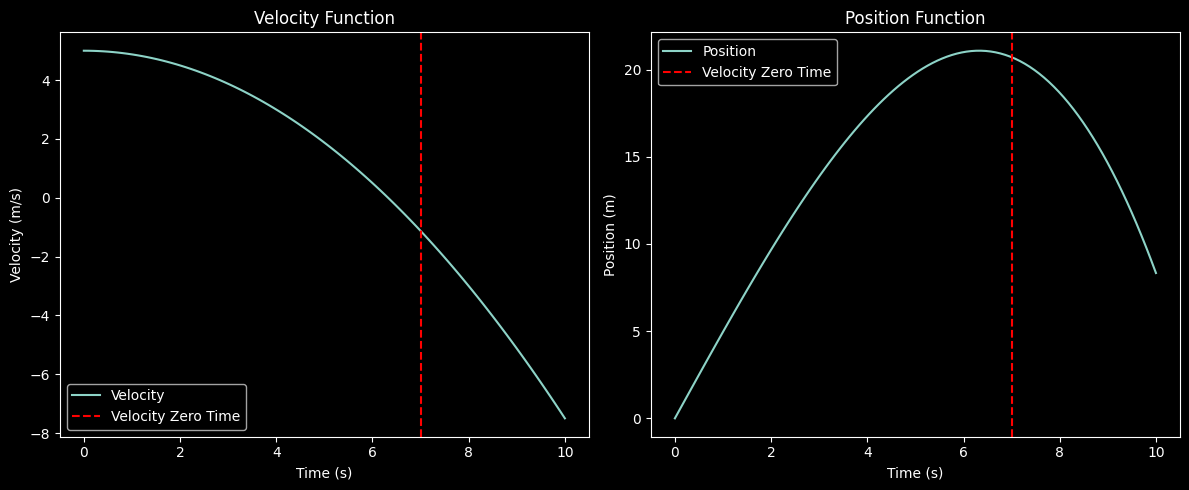

In [73]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(timeIntervals,velocityValues,label="Velocity")
plt.axvline(x=7,color="r",linestyle="--",label="Velocity Zero Time")
plt.title("Velocity Function")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.subplot(1,2,2)
plt.plot(timeIntervals,positionValues,label="Position")
plt.axvline(x=7,color="r",linestyle="--",label="Velocity Zero Time")
plt.title("Position Function")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.tight_layout()
plt.show()

## Example

**An astronaut is in orbit around a distant planet. Due to a malfunction in their thrusters, they begin to free fall towards the planet's surface. The gravitational acceleration on the planet is** $4.0$ $m/s^2$. **The astronaut's initial velocity is** $0m/s$ and initial height is 12 km.

In [81]:
gPlanet = 4.0 # Gravitational acceleration on the planet in m/s^2
initialVelocity = 0 # Initial velocity of the astronaut in m/s
initialHeight = 12e3 # Initial height of the astronaut in meters (12 km)

In [84]:
def PositionFunction(time:int or float)->int or float:
  return initialHeight-0.5*gPlanet*time**2+initialVelocity*time

In [85]:
# to calculate the time it takes for an object to fall from an initial height to the ground under the influence of gravity
timeToSurface = np.sqrt((2*initialHeight)/gPlanet)
timeToSurface # sec

77.45966692414834

In [86]:
timeInterval = np.linspace(0,timeToSurface, 100) # first 0-78 sec
positionValues = np.vectorize(PositionFunction)(timeInterval)

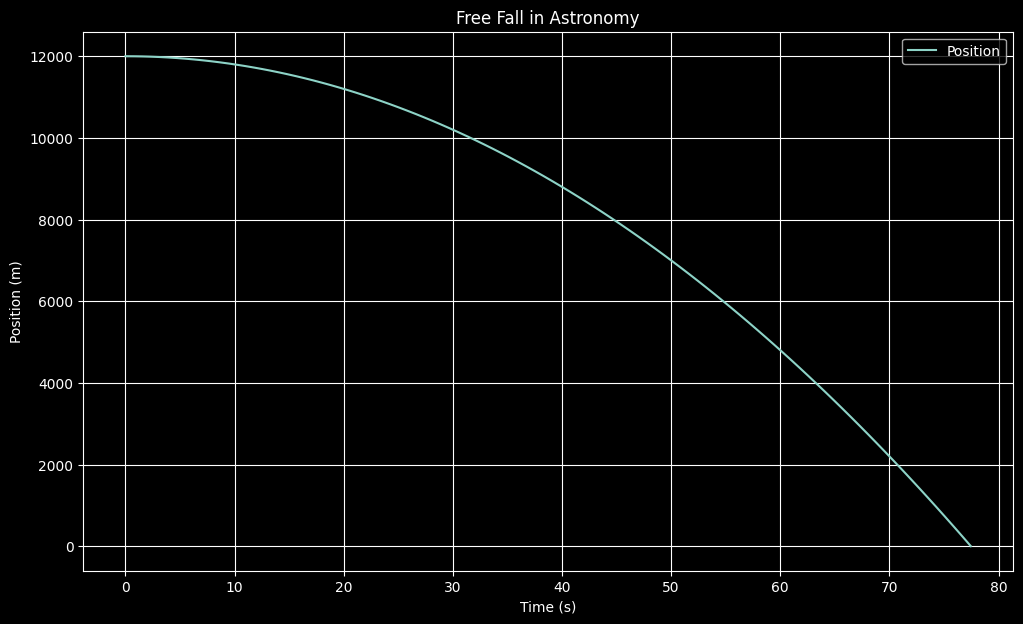

In [87]:
plt.figure(figsize=(12,7))
plt.plot(timeInterval,positionValues,label="Position")
plt.title("Free Fall in Astronomy")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.grid(True)
plt.show()